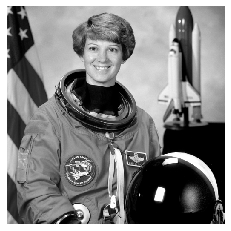

In [6]:
import cv2
import numpy as np
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY).astype(np.float)

plt.axis('off')
plt.imshow(astro ,cmap='gray')

In [7]:
## Poisson Noise

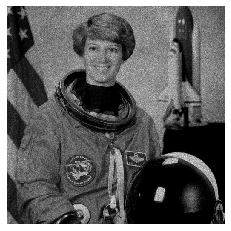

In [37]:
cnt_ratio = 0.1

# Poission Noise
astro_lowcnt = astro *cnt_ratio
poissonNoise = np.random.poisson(astro_lowcnt).astype(float)
noisyImage = astro_lowcnt + poissonNoise
plt.axis('off')
plt.imshow(noisyImage ,cmap='gray')


## Gaussian Filtering

In this, instead of box filter, **gaussian kernel** is used. 

It is done with the function, `cv.GaussianBlur()`. 

We should specify 
* the width and 
* height 

of kernel which should be 
* positive and 
* odd. 

We also should specify 
* the standard deviation in X and Y direction, 
  * sigmaX and 
  * sigmaY respectively. 
  
If only **sigmaX** is specified, *sigmaY is taken as same as sigmaX*. 

If **both are given as zeros**, 
they are calculated **from kernel size**. 

**Gaussian blurring is highly effective in removing gaussian noise(=white noise,백색잡음) from the image**.

If you want, you can create a Gaussian kernel with the function, `cv.getGaussianKernel()`.

The above code can be modified for Gaussian blurring:

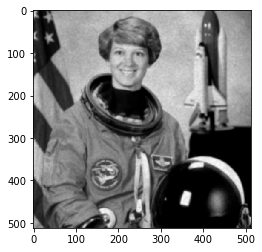

In [32]:
'''
img 
  Chennel수는 상관없으나, 
  depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F 이어야 함.
ksize 
  (width, height) 형태의 kernel size. 
  width와 height는 서로 다를 수 있지만, 
  양수의 홀수로 지정해야 함.
sigmaX 
  Gaussian kernel standard deviation in X direction.
  if 0, then the sd is automatically calculated from the ksize
'''
gauss_blur = cv2.GaussianBlur(noisyImage,(7,7),0)
plt.imshow(gauss_blur, cmap='gray')

## Median Filtering

Here, the function `cv.medianBlur()` takes median of all the pixels under kernel area and central element is replaced with this median value. 

* This is highly effective against **salt-and-pepper noise** in the images. 

Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. 
But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. 

**Its kernel size should be _a positive odd integer_**.


float64
float32
float64


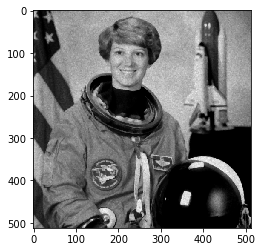

In [38]:
tmp64 = noisyImage
print(noisyImage.dtype)
noisyImage = noisyImage.astype(np.float32)
print(noisyImage.dtype)

#t.shape
median_blur = cv2.medianBlur(noisyImage,3)
plt.imshow(median_blur,cmap='gray')
noisyImage = tmp64
print(noisyImage.dtype)

## Averaging Filter

This is done by convolving image with a **normalized box filter**. 
It simply takes the average of all the pixels under kernel area and replace the central element. T

his is done by the function `cv.blur()` or `cv.boxFilter()`. 

Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:

$$
K = \frac{1}{9}\begin{bmatrix}
1 & 1& 1 \\
1 & 1& 1 \\
1 & 1& 1 \\
\end{bmatrix}
$$

> Note
>
>   If you don't want to use normalized box filter, use `cv.boxFilter()`. 
>   Pass an argument normalize=False to the function.

Check a sample demo below with a kernel of 9x9 size:

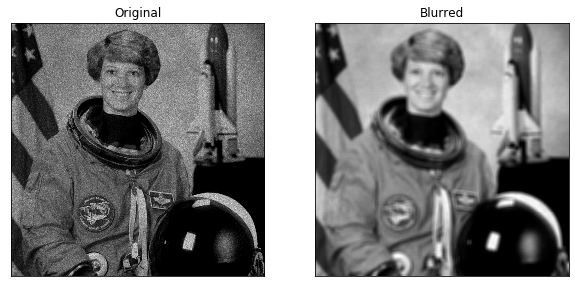

In [54]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

'''
src 
   Chennel수는 상관없으나, 
   depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
ksize 
   kernel 사이즈
'''
blur = cv.blur(noisyImage,(9,9))
#blur = cv.boxFilter(noisyImage,-1, (9,9),normalize=False)


plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(noisyImage, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
?cv.boxFilter

Docstring:
boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) -> dst
.   @brief Blurs an image using the box filter.
.   
.   The function smooths an image using the kernel:
.   
.   \f[\texttt{K} =  \alpha \begin{bmatrix} 1 & 1 & 1 &  \cdots & 1 & 1  \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \hdotsfor{6} \\ 1 & 1 & 1 &  \cdots & 1 & 1 \end{bmatrix}\f]
.   
.   where
.   
.   \f[\alpha = \fork{\frac{1}{\texttt{ksize.width*ksize.height}}}{when \texttt{normalize=true}}{1}{otherwise}\f]
.   
.   Unnormalized box filter is useful for computing various integral characteristics over each pixel
.   neighborhood, such as covariance matrices of image derivatives (used in dense optical flow
.   algorithms, and so on). If you need to compute pixel sums over variable-size windows, use #integral.
.   
.   @param src input image.
.   @param dst output image of the same size and type as src.
.   @param ddepth the output image depth (-1 to use src.depth()).
.   @param ksize blurring ke

## Bilateral Filtering

`cv.bilateralFilter()` is 
* highly effective in **noise removal** while 
* keeping **edges sharp**. 

But the operation is slower compared to other filters. 

We already saw that **gaussian filter** takes the a neighbourhood around the pixel and find its gaussian weighted average. 

**This gaussian filter is a function of space alone**, that is, nearby pixels are considered while filtering. 
* It doesn't consider whether pixels have almost same intensity. 
* It doesn't consider whether pixel is an edge pixel or not. 
* So it blurs the edges also, which we don't want to do.

**Bilateral filter** also 
* takes a gaussian filter in space, but 
* one more gaussian filter which is a function of **pixel difference**.


**Gaussian function of space** make sure only nearby pixels are considered for blurring while 
**gaussian function of intensity difference** make sure only those pixels with similar intensity to central pixel is considered for blurring. 

So **it preserves the edges since pixels at edges will have large intensity variation**.

Below samples shows use bilateral filter (For details on arguments, visit [docs](http://people.csail.mit.edu/sparis/bf_course/)).

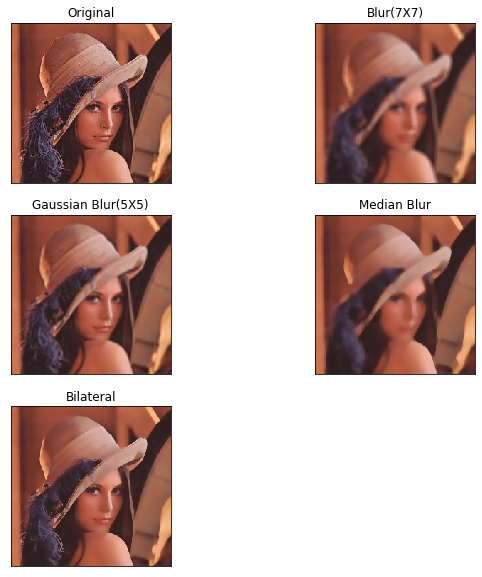

In [58]:
#-*-coding:utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/lena.jpg')

# pyplot를 사용하기 위해서 BGR을 RGB로 변환.
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])


# 일반 Blur
dst1 = cv2.blur(img,(7,7))

# GaussianBlur
dst2 = cv2.GaussianBlur(img,(5,5),0)

# Median Blur
dst3 = cv2.medianBlur(img,9)

# Bilateral Filtering
dst4 = cv2.bilateralFilter(img,9,75,75)

images = [img,dst1,dst2,dst3,dst4]
titles=['Original','Blur(7X7)','Gaussian Blur(5X5)','Median Blur','Bilateral']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1),plt.imshow(images[i]),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 2D Convolution Filter

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. 
* LPF helps in removing noises, blurring the images etc. 
* HPF filters helps in finding edges in the images.


OpenCV provides a function `cv.filter2D()` to convolve a kernel with an image. 

As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

$$
K = \frac{1}{25}\begin{bmatrix}
1 & 1& 1 & 1 & 1\\
1 & 1& 1 & 1 & 1\\
1 & 1& 1 & 1 & 1\\
1 & 1& 1 & 1 & 1\\
1 & 1& 1 & 1 & 1\\
\end{bmatrix}
$$

Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:

import numpy as np

In [59]:
ksize = 5
kernel = np.ones((ksize,ksize))
kernel = 1./(ksize*ksize)*kernel

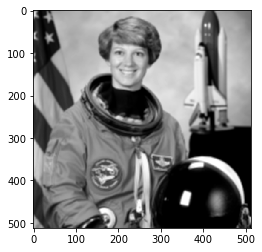

In [60]:
filtered = cv2.filter2D(astro,-1,kernel)

plt.imshow(filtered, cmap='gray')

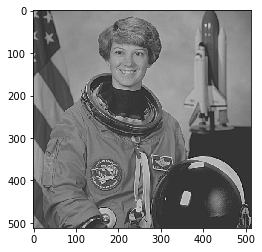

In [41]:
ALPHA = 1

kernel = cv2.getGaussianKernel(ksize,0)
kernel = -ALPHA*kernel @ kernel.T
kernel[ksize//2,ksize//2] += 1+ALPHA

filtered = cv2.filter2D(astro,-1,kernel)

plt.imshow(filtered, cmap='gray')

## Sobel and Scharr Derivatives 

**Sobel operators** is a joint Gausssian smoothing plus differentiation operation, so it is *more resistant to noise*. 

You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). 

You can also specify **the size of kernel** by the argument **ksize**. 
If `ksize = -1`, a **3x3 Scharr filter is used** which gives better results than 3x3 Sobel filter. 

Please see the docs for kernels used.

float64
not equal


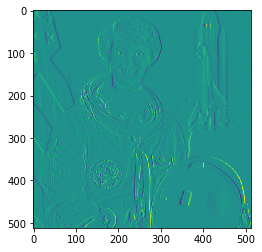

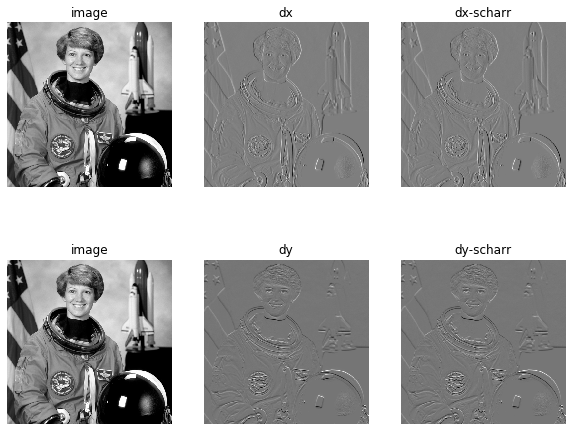

In [72]:
print(astro.dtype)
'''
src – input image
ddepth – output image의 depth, -1이면 input image와 동일.
dx – x축 미분 차수.
dy – y축 미분 차수.
ksize – kernel size(ksize x ksize)
'''
dx = cv2.Sobel(astro,cv2.CV_64F,1,0,ksize=3)
dy = cv2.Sobel(astro,cv2.CV_64F,0,1,ksize=3)
dx2 = cv2.Sobel(astro,cv2.CV_64F,1,0,ksize=-1)
dy2 = cv2.Sobel(astro,cv2.CV_64F,0,1,ksize=-1)

if not(np.array_equal(dx,dx2)):
    print('not equal')
    plt.imshow(dx-dx2)
    

plt.figure(figsize=(10,8))
plt.subplot(231)
plt.axis('off')
plt.title('image')
plt.imshow(astro,cmap='gray')

plt.subplot(232)
plt.axis('off')
plt.title('dx')
plt.imshow(dx,cmap='gray')
plt.subplot(233)
plt.axis('off')
plt.title('dx-scharr')
plt.imshow(dx2,cmap='gray')


plt.subplot(234)
plt.axis('off')
plt.title('image')
plt.imshow(astro,cmap='gray')
plt.subplot(235)
plt.axis('off')
plt.title('dy')
plt.imshow(dy,cmap='gray')
plt.subplot(236)
plt.axis('off')
plt.title('dy-scharr')
plt.imshow(dy2,cmap='gray')

In [61]:
?cv2.Sobel

Docstring:
Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
.   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
.   
.   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
.   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
.   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
.   or the second x- or y- derivatives.
.   
.   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
.   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
.   
.   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
.   
.   for the x-derivative, or transposed for the y-derivative.
.   
.   The function calculates an image derivative by convolving the image with the appropriat

## Laplacian Derivatives

It calculates the Laplacian of the image given by the relation, $\Delta \text{src}=\frac{\partial ^2\text{src}}{\partial x^2} + \frac{\partial ^2\text{src}}{\partial y^2}$ where each derivative is found **using Sobel derivatives**. If `ksize = 1`, then following kernel is used for filtering:

$$
\text{kernel}=\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
$$

Below code shows all operators in a single diagram. All kernels are of 5x5 size. Depth of output image is passed -1 to get the result in np.uint8 type.

uint8


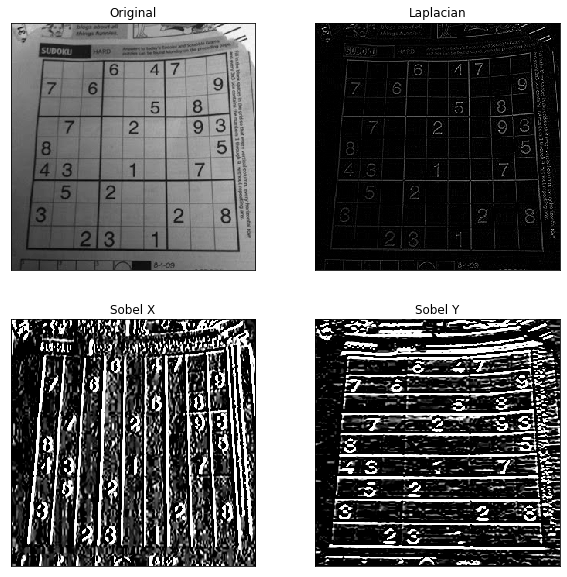

In [80]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('../images/sudoku.jpg',0)
print(img.dtype)
#laplacian = cv.Laplacian(img,cv.CV_64F)
laplacian = cv.Laplacian(img,-1)
#sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobelx = cv.Sobel(img,-1,1,0,ksize=5)
#sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
sobely = cv.Sobel(img,-1,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

# One Important Matter!

In our last example, output datatype is cv.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv.CV_16S, cv.CV_64F etc, take its absolute value and then convert back to cv.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in resul

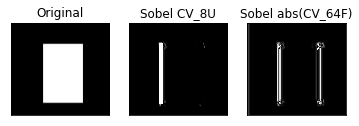

In [81]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../images/box.png',0)
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()